## Search Based Problem Solving

#### 我们根据中国的城市，做一个简易版的导航地图

## 问题描述

大家好，我们在用 networkx 显示中文的时候，会发现不能显示中文。 

## 解决办法

1. 下载附件中的字体； 
2. 在 jupyter notebook 中执行
```python
import matplotlib
print(matplotlib.__path__)
```
找到 matplotlib 的路径，然后 cd 到这个路径。 cd 到这个路径之后，继续 cd，cd 到 mpl-data/fonts/ttf 这个路径。 然后把 `DejaVuSans.ttf` 这个文件换成我们刚刚下在的文件。 

```bash
$ mv SimHei.ttf DejaVuSans.ttf
```

其中，用到的 ttf 字体。 我给大家传到附件上了。 

Previous Course

1. What's the language model? OOV problem? 
2. Syntax Tree. lambda 

$$ pr(w) $$

## Out of Vocabulary(OOV)

Pr(w_o) = constant < Pr(w_1)

## Language Model: Smooth

## Search Policy

In [1]:
import matplotlib
print(matplotlib.__path__)

['D:\\Design Software\\Anaconda\\lib\\site-packages\\matplotlib']


In [2]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [3]:
import networkx as nx

In [4]:
import re

In [5]:
ss = "{name:'澳门',name:'heihehie' geoCoord:[113.54, 22.19]}"

In [6]:
city = re.findall("name:'(\w+)'", ss)

In [7]:
type(city)

list

In [8]:
city_location = {}


In [9]:
for line in coordination_source.split('\n'):
    if line.startswith('//'): continue
    if line.strip() == '': continue
    
    city = re.findall("name:'(\w+)'", line)[0]
    # python re referenes: https://docs.python.org/3/library/re.html
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
    city_location[city] = x_y
    print(city, x_y)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


In [10]:
import math

In [11]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [12]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [13]:
get_city_distance('杭州', '上海')

153.5185697155768

In [14]:
import networkx as nx  

In [15]:
cities = list(city_location.keys())

In [16]:
cities[:5]

['兰州', '嘉峪关', '西宁', '成都', '石家庄']

In [17]:
city_graph = nx.Graph()

In [18]:
city_graph.add_nodes_from(cities)

In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt

In [21]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [22]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

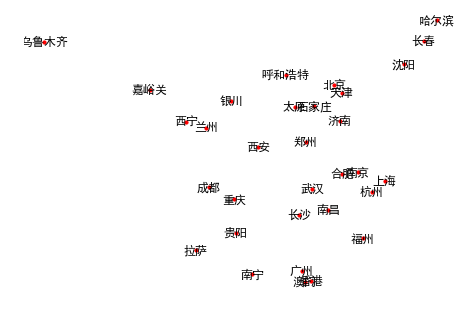

In [23]:
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [24]:
threshold = 700

In [25]:
from collections import defaultdict

In [26]:
cities_connection = defaultdict(list)

In [27]:
#所有小于threshold的城市都连接起来
for c1 in cities:
    for c2 in cities:
        if c1 == c2: continue
        
        if get_city_distance(c1, c2) < threshold: 
            cities_connection[c1].append(c2)

In [28]:
cities_connection['兰州']

['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']

In [29]:
cities_connection_graph = nx.Graph(cities_connection)

In [30]:
j = 0
for i in cities_connection:
    j += 1
    if(j > 5):break
    print(i, cities_connection[i])

兰州 ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']
嘉峪关 ['兰州', '西宁', '成都', '拉萨']
西宁 ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川']
成都 ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']
石家庄 ['武汉', '郑州', '济南', '南京', '合肥', '南昌', '广州', '长沙', '太原', '西安', '北京', '天津', '呼和浩特']


D:\Design Software\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


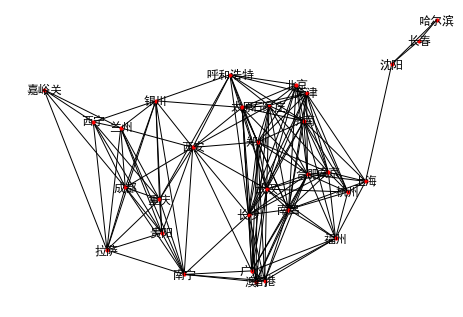

In [31]:
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size=10)

In [32]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京','上海'],
    '上海': ['福州'],
    '福州': ['长沙','上海'],
    '南宁': ['长沙']
}

In [33]:
simple_connection_info = defaultdict(list)

In [34]:
simple_connection_info.update(simple_connection_info_src)

## 标准广度和深度搜索方法

In [35]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop(0) # 模拟队列
        
        if froninter in seen: continue  #如果元素已经被访问则跳过本次
        
        for successor in graph[froninter]: #遍历栈顶元素所有连接点
            if successor in seen: continue  #如果当前元素连接点被访问则跳过本次
            print(successor)
            
            #visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first  相当与把元素放入队首
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [36]:
number_grpah = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

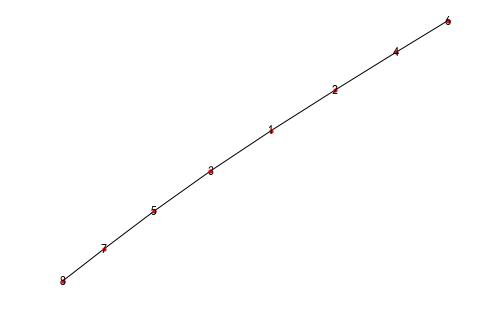

In [37]:
nx.draw(nx.Graph(number_grpah),with_labels=True, node_size=10)

In [38]:
bfs(number_grpah, 1)

2
3
5
7
8
4
6


{1, 2, 3, 4, 5, 6, 7, 8}

In [39]:
simple_connection_info['西安']

['兰州', '长沙']

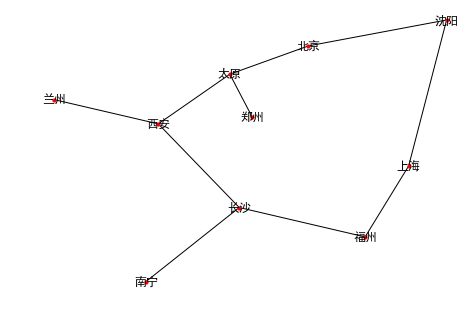

In [40]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

## 自定义搜索策略,不是广度和深度了，因为每次改变了pathes的排序

In [41]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]  #每走一步都添加一个新的路径
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)   #获取当前要访问的路径
        froninter = path[-1]   #获取当前达到的节点
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]  #获取当前节点的所有连接节点
        print('当前访问节点：', froninter)
        print('当前节点邻接节点: ', successors)
        for city in successors:
            if city in path: continue  # eliminate loop 防止环形,也防止重复访问,和city in visitied有同样效果
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制
        print('sorted', pathes , '\n')

In [42]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [43]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [44]:
def shortest_path_first(pathes):
    #print(pathes)
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for i, station in enumerate(path[:-1]):
            #print(station, path[i+1])
            distance += get_city_distance(station, path[i+1])
            
        return distance
    
    return sorted(pathes, key=get_path_distnace)

In [45]:
get_city_distance('沈阳', '上海')

664.4873799505449

In [46]:
get_city_distance('沈阳', '北京')

776.4154006857316

In [47]:
search('沈阳', '南宁', simple_connection_info, sort_candidate=shortest_path_first)

当前访问节点： 沈阳
当前节点邻接节点:  ['北京', '上海']
sorted [['沈阳', '上海'], ['沈阳', '北京']] 

当前访问节点： 上海
当前节点邻接节点:  ['福州']
sorted [['沈阳', '北京'], ['沈阳', '上海', '福州']] 

当前访问节点： 北京
当前节点邻接节点:  ['太原', '沈阳']
sorted [['沈阳', '上海', '福州'], ['沈阳', '北京', '太原']] 

当前访问节点： 福州
当前节点邻接节点:  ['长沙', '上海']
sorted [['沈阳', '北京', '太原'], ['沈阳', '上海', '福州', '长沙']] 

当前访问节点： 太原
当前节点邻接节点:  ['北京', '西安', '郑州']
sorted [['沈阳', '北京', '太原', '郑州'], ['沈阳', '北京', '太原', '西安'], ['沈阳', '上海', '福州', '长沙']] 

当前访问节点： 郑州
当前节点邻接节点:  ['太原']
sorted [['沈阳', '北京', '太原', '西安'], ['沈阳', '上海', '福州', '长沙']] 

当前访问节点： 西安
当前节点邻接节点:  ['兰州', '长沙']
sorted [['沈阳', '上海', '福州', '长沙'], ['沈阳', '北京', '太原', '西安', '长沙'], ['沈阳', '北京', '太原', '西安', '兰州']] 

当前访问节点： 长沙
当前节点邻接节点:  ['福州', '南宁']


['沈阳', '上海', '福州', '长沙', '南宁']

In [48]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [49]:
pretty_print(search('北京', '福州', simple_connection_info ,sort_candidate=transfer_stations_first))

当前访问节点： 北京
当前节点邻接节点:  ['太原', '沈阳']
sorted [['北京', '太原'], ['北京', '沈阳']] 

当前访问节点： 太原
当前节点邻接节点:  ['北京', '西安', '郑州']
sorted [['北京', '沈阳'], ['北京', '太原', '西安'], ['北京', '太原', '郑州']] 

当前访问节点： 沈阳
当前节点邻接节点:  ['北京', '上海']
sorted [['北京', '太原', '西安'], ['北京', '太原', '郑州'], ['北京', '沈阳', '上海']] 

当前访问节点： 西安
当前节点邻接节点:  ['兰州', '长沙']
sorted [['北京', '太原', '郑州'], ['北京', '沈阳', '上海'], ['北京', '太原', '西安', '兰州'], ['北京', '太原', '西安', '长沙']] 

当前访问节点： 郑州
当前节点邻接节点:  ['太原']
sorted [['北京', '沈阳', '上海'], ['北京', '太原', '西安', '兰州'], ['北京', '太原', '西安', '长沙']] 

当前访问节点： 上海
当前节点邻接节点:  ['福州']
北京🚗->沈阳🚗->上海🚗->福州


## Assignment

1. 网络爬虫 + 正则
2. 数据处理
3. 算法的应用能力

In [50]:
import requests

In [51]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [52]:
response = requests.get(url)

In [53]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [54]:
pattern = re.compile(what_we_want)

In [55]:
likes = pattern.findall(response.text)

In [56]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page
movie.douban.com/subject/3168101/?from=subject-page


## Machine Learning, the first step

In [57]:
from sklearn.datasets import load_boston

In [58]:
dataset = load_boston()

In [59]:
type(dataset)

sklearn.utils.Bunch

In [60]:
X, y = dataset['data'], dataset['target']

In [61]:
X.shape

(506, 13)

In [62]:
y.shape

(506,)

In [63]:
y[:3]

array([24. , 21.6, 34.7])

In [64]:
X[0] #Attribute的值

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [65]:
X[:, 0].shape

(506,)

In [66]:
y.shape

(506,)

In [67]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

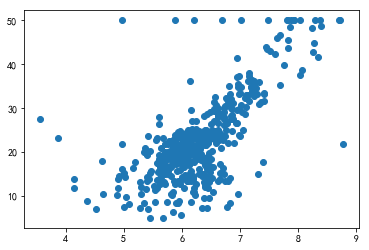

In [68]:
plt.scatter(X[:, 5], y)

In [69]:
room_num = X[:, 5]#获取索引号为5的所有数据，这里是average number of rooms per dwelling

In [70]:
X[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [71]:
room_num[:3]

array([6.575, 6.421, 7.185])

In [72]:
price = y

In [73]:
import random

In [74]:
import numpy as np

In [75]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

In [76]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

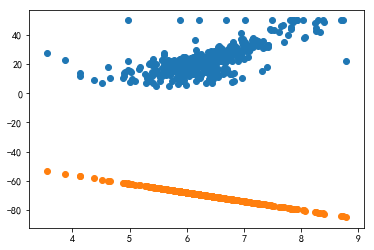

In [77]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$

In [78]:
def loss(y, y_hat): # to evaluate the performance 
    #return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))
    return np.mean(np.square(y - y_hat))

## First-Method: Random generation: get best k and best b

In [79]:
X_rm = X[:, 5]

In [90]:
trying_times = 2000

min_loss = float('inf') # 无穷大
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, np.array(price_by_random_k_and_b))
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 27.887330893725817 best_b: 75.0881676116029, and the loss is: 52118.06879893667
When time is : 4, get best_k: 37.395229471229584 best_b: -43.330827203222746, and the loss is: 29050.304914628723
When time is : 10, get best_k: -7.411252852455789 best_b: 7.679030663801939, and the loss is: 3951.6961450012477
When time is : 23, get best_k: 8.012813845170854 best_b: -12.705018408734503, and the loss is: 272.7929344795723
When time is : 52, get best_k: 17.14526378937586 best_b: -72.64149579201785, and the loss is: 233.66545737934865
When time is : 72, get best_k: 12.979928970829562 best_b: -52.671895183181185, and the loss is: 91.57878861032782
When time is : 98, get best_k: 5.892467482689128 best_b: -9.664683182414052, and the loss is: 72.04872677870448
When time is : 250, get best_k: 6.075808380172873 best_b: -14.942392631683958, and the loss is: 48.615629692762504
When time is : 788, get best_k: 10.89745347482176 best_b: -46.673194106992135, and the loss is: 

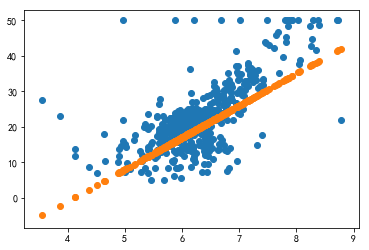

In [81]:
X_rm = X[:, 5]
k = 9
b = -37
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## 2nd-Method: Direction Adjusting

In [88]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.5

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: -57.72221890733494 best_b: -75.26972495445536, and the loss is: 214364.37366529138
When time is : 2, get best_k: -57.22221890733494 best_b: -74.76972495445536, and the loss is: 210989.78747525264
When time is : 3, get best_k: -56.72221890733494 best_b: -74.26972495445536, and the loss is: 207641.98058190066
When time is : 4, get best_k: -56.22221890733494 best_b: -73.76972495445536, and the loss is: 204320.95298523543
When time is : 5, get best_k: -55.72221890733494 best_b: -73.26972495445536, and the loss is: 201026.70468525696
When time is : 6, get best_k: -55.22221890733494 best_b: -72.76972495445536, and the loss is: 197759.23568196528
When time is : 7, get best_k: -54.72221890733494 best_b: -72.26972495445536, and the loss is: 194518.54597536032
When time is : 8, get best_k: -54.22221890733494 best_b: -71.76972495445536, and the loss is: 191304.63556544212
When time is : 9, get best_k: -53.72221890733494 best_b: -71.26972495445536, and the loss is: 18

如果我们想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：

#### 找对改变的方向

#### 如何找对改变的方向呢？ 

#### 2nd-method: 监督让他变化--> 监督学习

## 导数